In [17]:
%pylab inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
#cordenadas de puntos azules
xb=zeros(100)
yb=zeros(100)
#cordenadas de puntos cyan
xn=zeros(100)
yn=zeros(100)

#creando los arreglos
for i in range(len(xb)):
    xb[i]=normal(1,1)
    yb[i]=normal(0,1)
    xn[i]=normal(0,1)
    yn[i]=normal(1,1)

In [19]:
#creando un grid de puntos
p=50
X=zeros([p,p])
Y=zeros([p,p])
x=linspace(-5,5,p)
y=linspace(-5,5,p)

for i in range(len(X[:,0])):
    
    for j in range(len(Y[:,0])):
        X[i][j]=x[i]
        Y[i][j]=y[j]
    



(-5, 5)

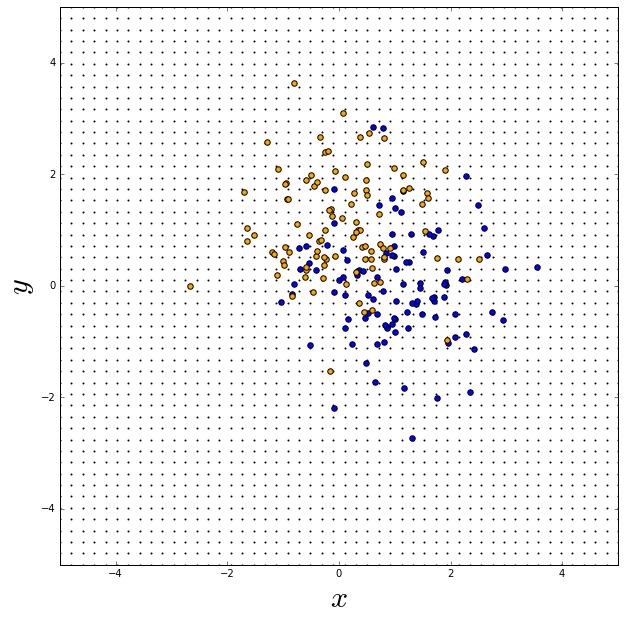

In [20]:
figsize(10,10)
scatter(X,Y,s=1,c="c")
scatter(xb,yb,c='b',s=30)
scatter(xn,yn,c='orange',s=30)
ylabel("$ y\ $",size=30)
xlabel("$ x\ $",size=30)
xlim(-5,5)
ylim(-5,5)

Para crear los datos se toma un input de x,y (las cordenadas de los puntos) y como respuesta 1 o 0 dependiento del valor que se tome. Usaremos scikit para divir estos datos entre entrenamiento y test.


In [21]:
#cordenadas de puntos azules
xb=zeros(100)
yb=zeros(100)
#cordenadas de puntos cyan
xn=zeros(100)
yn=zeros(100)

xbc=1
ybc=0
xnc=0
ync=1
for i in range(len(xb)):
    xb[i]=normal(xbc,1)
    yb[i]=normal(ybc,1)
    xn[i]=normal(xnc,1)
    yn[i]=normal(ync,1)
    
    
#creando la matriz X de entrenamiento

Xresp=zeros([2*len(xb),2])

#creando las respuestas esperabas donde 0 es para naranja y 1 es para azul

Yresp=zeros(2*len(xb))


for i in range(len(xb)):
    
    Xresp[2*i][0]=xb[i]
    Xresp[2*i][1]=yb[i]  
    Yresp[2*i]=1
    Xresp[2*i+1][0]=xn[i]
    Xresp[2*i+1][1]=yn[i]  
    Yresp[2*i+1]=0
    


In [22]:
#creando modelo de regresion lineal del paquete scikit
linreg = LinearRegression()

#aqui se crea un modelo lineal que da los coeficientes usados apra predecir la respuesta

linreg.fit(Xresp, Yresp)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print linreg.intercept_
print linreg.coef_

0.539588413309
[ 0.13983408 -0.21230581]


En la ecuación anterior tenemos que $ G=\beta_{0}+\beta_{1}\cdot x+\beta_{2}\cdot y\ $ 
Graficaremos solo la componente $ x $ para ver la separacion que esta da con la linea

(-5, 5)

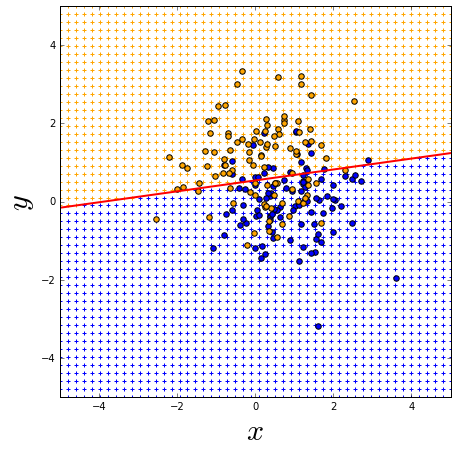

In [26]:
a=linspace(-5,5,1000)
b=a*linreg.coef_[0]+linreg.intercept_
#c=a*linreg.coef_[1]+linreg.intercept_


figsize(7,7)

for i in range(len(X[:,0])):
    for j in range(len(X[0,:])):
        
        if(Y[i][j]<X[i][j]*linreg.coef_[0]+linreg.intercept_):
            scatter(X[i][j],Y[i][j],s=10,c="b",marker="+")
        else:
            scatter(X[i][j],Y[i][j],s=10,c="orange",marker="+")


plot(a,b,c="r",linewidth=2)
#plot(c,a,c="green",linewidth=2)
scatter(xb,yb,c='b',s=30)
scatter(xn,yn,c='orange',s=30)


ylabel("$ y\ $",size=30)
xlabel("$ x\ $",size=30)
xlim(-5,5)
ylim(-5,5)


Miremos como actuara este aprendizage en un par de datos extra, es decir los datos test


In [27]:
xpb=zeros(1000)
ypb=zeros(1000)
#cordenadas de puntos cyan
xpn=zeros(1000)
ypn=zeros(1000)

for i in range(len(xpb)):
    xpb[i]=normal(xbc,1)
    ypb[i]=normal(ybc,1)
    xpn[i]=normal(xnc,1)
    ypn[i]=normal(ync,1)
    
   


(-5, 5)

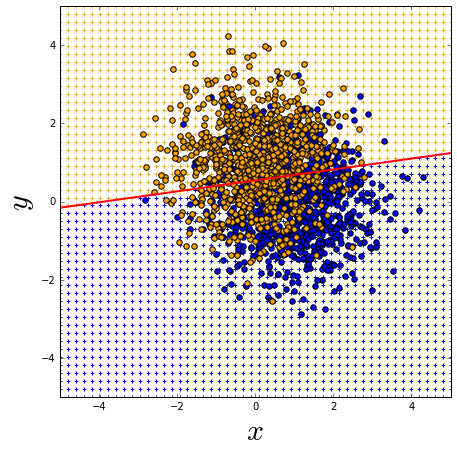

In [29]:


for i in range(len(X[:,0])):
    for j in range(len(X[0,:])):
        
        if(Y[i][j]<X[i][j]*linreg.coef_[0]+linreg.intercept_):
            scatter(X[i][j],Y[i][j],s=10,c="b",marker="+")
        else:
            scatter(X[i][j],Y[i][j],s=10,c="orange",marker="+")


plot(a,b,c="r",linewidth=2)
scatter(xpb,ypb,c='b',s=30)
scatter(xpn,ypn,c='orange',s=30)

ylabel("$ y\ $",size=30)
xlabel("$ x\ $",size=30)
xlim(-5,5)
ylim(-5,5)



# Nearest neighbors
Para usar este metodo primero tenemos que crear unos puntos test para generar una division por vecinos

In [30]:
#cordenadas de puntos azules
xb=zeros(100)
yb=zeros(100)
#cordenadas de puntos cyan
xn=zeros(100)
yn=zeros(100)

xbc=1
ybc=0
xnc=0
ync=1
for i in range(len(xb)):
    xb[i]=normal(xbc,1)
    yb[i]=normal(ybc,1)
    xn[i]=normal(xnc,1)
    yn[i]=normal(ync,1)
    
    
#creando la matriz X de entrenamiento

X=zeros([2*len(xb),2])

#creando las respuestas esperabas donde 0 es para naranja y 1 es para azul

y=zeros(2*len(xb))


for i in range(len(xb)):
    
    X[2*i][0]=xb[i]
    X[2*i][1]=yb[i]  
    y[2*i]=1
    X[2*i+1][0]=xn[i]
    X[2*i+1][1]=yn[i]  
    y[2*i+1]=0
    

In [31]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

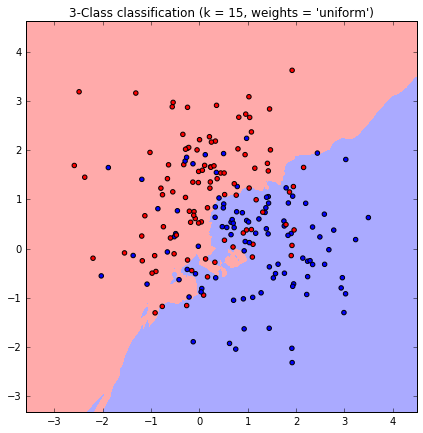

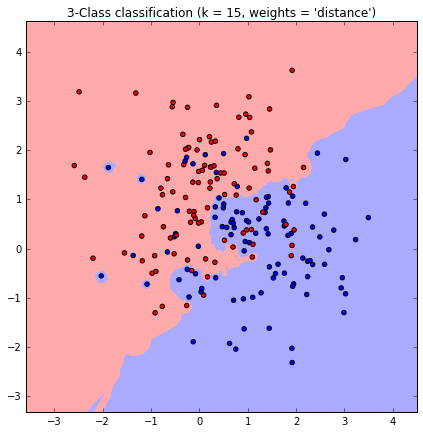

In [32]:
n_neighbors =15
h=0.02
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()






0
1


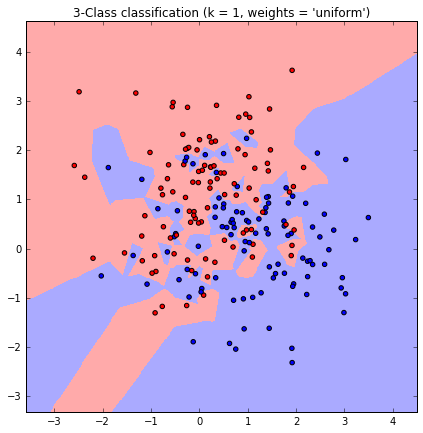

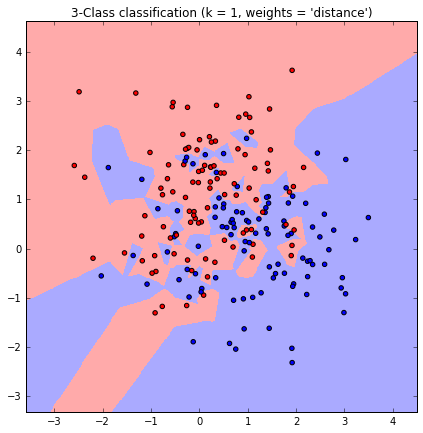

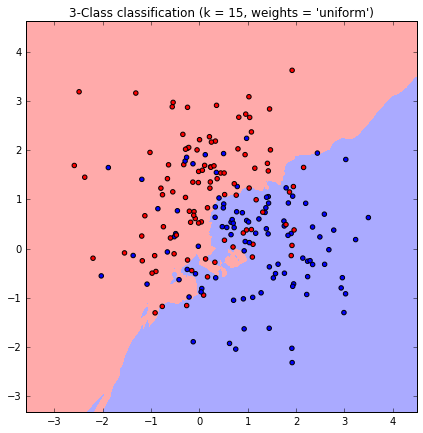

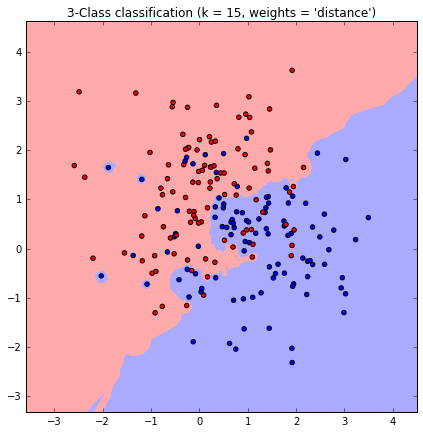

In [33]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
Ne=[1,15]
h=0.02
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for i in range(len(Ne)):
    
    n_neighbors=Ne[i]
    print i
    
    for weights in ['uniform', 'distance']:
        
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()





